# Math 189 Final Project Sentiment Evaluation
## Matti <3
- Cleaning the data
- Finding the word frequency distribution
- Comparing Vader vs Text Blob

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
link= "https://docs.google.com/spreadsheets/d/e/2PACX-1vS1QTZs2hTLJ_F3NHU07_GZHxJ6TsT76iYYao3XoP0LuKyKjxWqdScPOEOJ6ddEznhEDYmRBWyKNP4u/pub?output=tsv"

In [3]:
df = pd.read_csv(link, sep='|')
df.head()

,Unnamed: 0,raw_number,content,negative,neutral,positive,compound\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t
0,0,#1 (1957),The one at the Meads's house\twhere it's bigge...,0.010,0.948,0.041,0.6486
1,1,#2 (8/11/67),I'm at a family reunion in a large fine house ...,0.041,0.906,0.053,-0.1941
2,2,#3 (8/1/85),I watch a plane fly past and shortly realize i...,0.076,0.856,0.069,-0.1573
3,3,#4 (1985?),Me pulling the green leaves and berries off so...,0.098,0.829,0.073,-0.9523
4,4,#5 (1985?),I'm in a room that reminds me of (but definite...,0.040,0.889,0.071,0.9639


In [4]:
df.shape

(422, 7)

## Cleaning
- Tokenizing
- Stop words
- Stemming

In [5]:
df['date'] = df['raw_number'].str.extract(r'\((.*?)\)')[0]
df=df.drop(columns=['raw_number', 'negative', 'neutral','positive', 'compound\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t'])
df=df.rename(columns={'content': 'dreams'})
df.head()

,Unnamed: 0,dreams,date
0,0,The one at the Meads's house\twhere it's bigge...,1957
1,1,I'm at a family reunion in a large fine house ...,8/11/67
2,2,I watch a plane fly past and shortly realize i...,8/1/85
3,3,Me pulling the green leaves and berries off so...,1985?
4,4,I'm in a room that reminds me of (but definite...,1985?


In [6]:
df['dreams'] = df['dreams'].str.lower()

In [7]:
df.isnull().sum()

Unnamed: 0    0
dreams        0
date          0
dtype: int64

### Tokenizing
- Tokenizing data in a dataframe is making each of the sentences into a list where each word from the sentence is a different component of the list.

In [8]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [9]:
df['tokenized'] = df['dreams'].apply(tokenizer.tokenize)
df.head()

,Unnamed: 0,dreams,date,tokenized
0,0,the one at the meads's house\twhere it's bigge...,1957,"[the, one, at, the, meads, s, house, where, it..."
1,1,i'm at a family reunion in a large fine house ...,8/11/67,"[i, m, at, a, family, reunion, in, a, large, f..."
2,2,i watch a plane fly past and shortly realize i...,8/1/85,"[i, watch, a, plane, fly, past, and, shortly, ..."
3,3,me pulling the green leaves and berries off so...,1985?,"[me, pulling, the, green, leaves, and, berries..."
4,4,i'm in a room that reminds me of (but definite...,1985?,"[i, m, in, a, room, that, reminds, me, of, but..."


### Stop words
- Here, we are using the tokenized lists and removing any words that do not have a positive/negative sentiment to it.
  - For example: the, at, a, and, that, etc.

In [10]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [12]:
df['stop_words'] = df['tokenized'].apply(lambda x: [item for item in x if item not in stop_words])
df.head()

,Unnamed: 0,dreams,date,tokenized,stop_words
0,0,the one at the meads's house\twhere it's bigge...,1957,"[the, one, at, the, meads, s, house, where, it...","[one, meads, house, bigger, inside, european, ..."
1,1,i'm at a family reunion in a large fine house ...,8/11/67,"[i, m, at, a, family, reunion, in, a, large, f...","[family, reunion, large, fine, house, grounds,..."
2,2,i watch a plane fly past and shortly realize i...,8/1/85,"[i, watch, a, plane, fly, past, and, shortly, ...","[watch, plane, fly, past, shortly, realize, lo..."
3,3,me pulling the green leaves and berries off so...,1985?,"[me, pulling, the, green, leaves, and, berries...","[pulling, green, leaves, berries, branches, bu..."
4,4,i'm in a room that reminds me of (but definite...,1985?,"[i, m, in, a, room, that, reminds, me, of, but...","[room, reminds, definitely, living, room, hous..."


### Stemming
- Using the list of words with the stop words removed, stemming will make each of the words originate back to their root.
  - For example: ran, run, running will all originate to the root word run
  - This is mainly used for word frequency.


In [13]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [14]:
df['stemmed']=df['stop_words'].apply(lambda x: [ps.stem(y) for y in x])
df.head()

,Unnamed: 0,dreams,date,tokenized,stop_words,stemmed
0,0,the one at the meads's house\twhere it's bigge...,1957,"[the, one, at, the, meads, s, house, where, it...","[one, meads, house, bigger, inside, european, ...","[one, mead, hous, bigger, insid, european, vil..."
1,1,i'm at a family reunion in a large fine house ...,8/11/67,"[i, m, at, a, family, reunion, in, a, large, f...","[family, reunion, large, fine, house, grounds,...","[famili, reunion, larg, fine, hous, ground, ma..."
2,2,i watch a plane fly past and shortly realize i...,8/1/85,"[i, watch, a, plane, fly, past, and, shortly, ...","[watch, plane, fly, past, shortly, realize, lo...","[watch, plane, fli, past, shortli, realiz, low..."
3,3,me pulling the green leaves and berries off so...,1985?,"[me, pulling, the, green, leaves, and, berries...","[pulling, green, leaves, berries, branches, bu...","[pull, green, leav, berri, branch, bush, live,..."
4,4,i'm in a room that reminds me of (but definite...,1985?,"[i, m, in, a, room, that, reminds, me, of, but...","[room, reminds, definitely, living, room, hous...","[room, remind, definit, live, room, hous, stre..."


## Word Frequency Distribution
This is a visual representation of the words that are used most often in the dream content.

In [15]:
from nltk.probability import FreqDist
import string

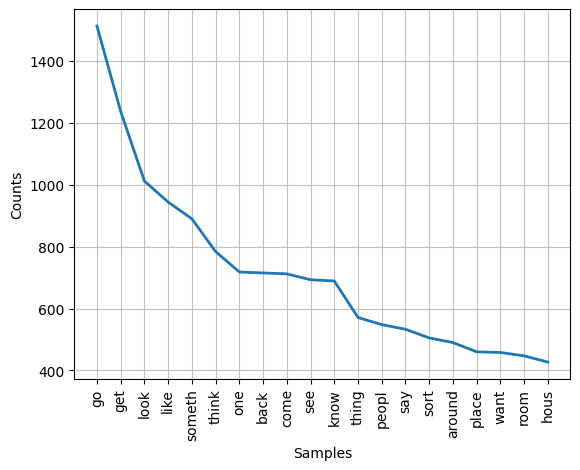

In [16]:
dream = df['stemmed'].apply(pd.Series).stack()
fdist = FreqDist(dream)

for punc in string.punctuation:
    del fdist[punc]


fdist.plot(20, cumulative=False);

## TF-IDF


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
tfidf = TfidfVectorizer(sublinear_tf=True,
                        analyzer='word',
                        max_features=200,
                        tokenizer=tokenizer.tokenize)

In [19]:
tfidf_X = tfidf.fit_transform(df['dreams']).toarray()
print(tfidf_X.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(422, 200)


In [20]:
idf = tfidf.idf_
rr = dict(zip(tfidf.fit(df['dreams']).get_feature_names_out(), idf))

token_weight = pd.DataFrame.from_dict(rr, orient='index').reset_index()
token_weight.columns=('token','weight')
token_weight = token_weight.sort_values(by='weight', ascending=False)
token_weight.head()

,token,weight
28,bus,3.309703
188,were,2.628532
118,our,2.616555
131,realize,2.558736
48,end,2.525584


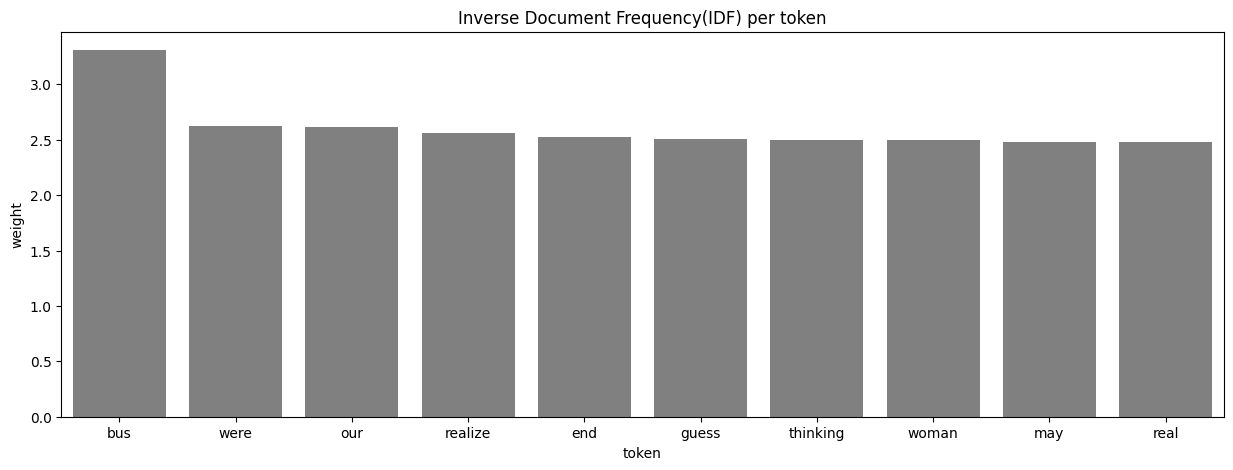

In [21]:
sns.barplot(x = 'token',
            y = 'weight',
            data = token_weight[0:10],
            color = "gray")
plt.title("Inverse Document Frequency(IDF) per token")
fig = plt.gcf()
fig.set_size_inches(15,5);

## Vader


In [22]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [50]:
df['cleaned_sentence'] = df['stop_words'].apply(lambda x: " ".join(x))
df.head()

,Unnamed: 0,dreams,date,tokenized,stop_words,stemmed,cleaned_sentence
0,0,the one at the meads's house\twhere it's bigge...,1957,"[the, one, at, the, meads, s, house, where, it...","[one, meads, house, bigger, inside, european, ...","[one, mead, hous, bigger, insid, european, vil...",one meads house bigger inside european village...
1,1,i'm at a family reunion in a large fine house ...,8/11/67,"[i, m, at, a, family, reunion, in, a, large, f...","[family, reunion, large, fine, house, grounds,...","[famili, reunion, larg, fine, hous, ground, ma...",family reunion large fine house grounds maybe ...
2,2,i watch a plane fly past and shortly realize i...,8/1/85,"[i, watch, a, plane, fly, past, and, shortly, ...","[watch, plane, fly, past, shortly, realize, lo...","[watch, plane, fli, past, shortli, realiz, low...",watch plane fly past shortly realize low crash...
3,3,me pulling the green leaves and berries off so...,1985?,"[me, pulling, the, green, leaves, and, berries...","[pulling, green, leaves, berries, branches, bu...","[pull, green, leav, berri, branch, bush, live,...",pulling green leaves berries branches bush liv...
4,4,i'm in a room that reminds me of (but definite...,1985?,"[i, m, in, a, room, that, reminds, me, of, but...","[room, reminds, definitely, living, room, hous...","[room, remind, definit, live, room, hous, stre...",room reminds definitely living room house stre...


In [24]:
dream_list = list(df['cleaned_sentence'].values)

In [25]:
def get_sentiments(input_list):
    output = []

    for dream in input_list:
        ss = analyser.polarity_scores(dream)
        ss['dream'] = dream
        output.append(ss)

    return pd.DataFrame(output)

In [26]:
dream_sentiments = get_sentiments(dream_list)

In [51]:
dream_sentiments.head()

,neg,neu,pos,compound,dream
0,0.022,0.894,0.084,0.6170,one meads house bigger inside european village...
1,0.112,0.778,0.109,-0.5267,family reunion large fine house grounds maybe ...
2,0.208,0.681,0.111,-0.9678,watch plane fly past shortly realize low crash...
3,0.135,0.688,0.177,0.7569,pulling green leaves berries branches bush liv...
4,0.092,0.776,0.131,0.8211,room reminds definitely living room house stre...


In [28]:
dream_sentiments.describe()

,neg,neu,pos,compound
count,422.000000,422.000000,422.000000,422.000000
mean,0.084668,0.748656,0.166652,0.554464
std,0.056536,0.070763,0.064306,0.629383
min,0.000000,0.492000,0.000000,-0.985200
25%,0.047000,0.710250,0.126000,0.406800
50%,0.075000,0.753500,0.164000,0.889750
75%,0.110750,0.795000,0.202000,0.976675
max,0.414000,1.000000,0.508000,0.999000


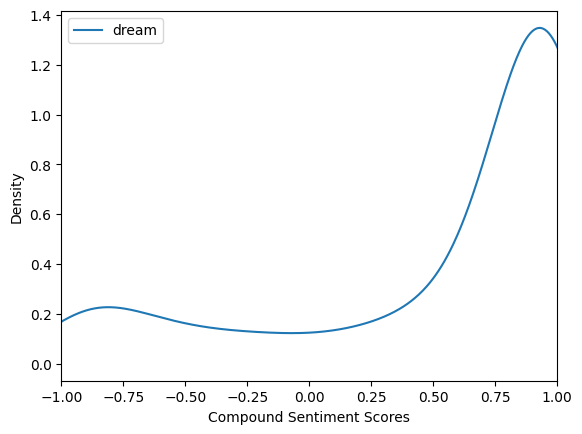

In [29]:
dream_sentiments['compound'].plot.density(label='dream')
plt.legend()
plt.xlabel('Compound Sentiment Scores')
plt.xlim(-1,1);

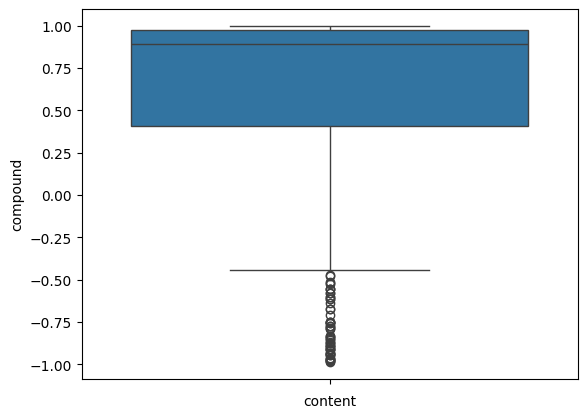

In [30]:
sns.boxplot(data=dream_sentiments, y='compound')
plt.xlabel('content');

## Text Blob

In [31]:
dream_sentiments.head()

,neg,neu,pos,compound,dream
0,0.022,0.894,0.084,0.6170,one meads house bigger inside european village...
1,0.112,0.778,0.109,-0.5267,family reunion large fine house grounds maybe ...
2,0.208,0.681,0.111,-0.9678,watch plane fly past shortly realize low crash...
3,0.135,0.688,0.177,0.7569,pulling green leaves berries branches bush liv...
4,0.092,0.776,0.131,0.8211,room reminds definitely living room house stre...


In [32]:
sentiments = dream_sentiments.drop(columns=['neg', 'neu','pos'])
sentiments = sentiments.rename(columns={'compound': 'vader'})
sentiments.head()

,vader,dream
0,0.6170,one meads house bigger inside european village...
1,-0.5267,family reunion large fine house grounds maybe ...
2,-0.9678,watch plane fly past shortly realize low crash...
3,0.7569,pulling green leaves berries branches bush liv...
4,0.8211,room reminds definitely living room house stre...


In [33]:
from textblob import TextBlob

In [34]:
def text_blob_polarity(sentence):
    analysis = TextBlob(sentence)
    return analysis.sentiment.polarity

def text_blob_subjectivity(sentence):
    analysis = TextBlob(sentence)
    return analysis.sentiment.subjectivity

In [35]:
sentiments['text_blob_pol'] = dream_sentiments['dream'].apply(text_blob_polarity)
sentiments['text_blob_sub'] = dream_sentiments['dream'].apply(text_blob_subjectivity)
sentiments.head()

,vader,dream,text_blob_pol,text_blob_sub
0,0.6170,one meads house bigger inside european village...,0.016250,0.302500
1,-0.5267,family reunion large fine house grounds maybe ...,0.003728,0.418546
2,-0.9678,watch plane fly past shortly realize low crash...,0.014583,0.419444
3,0.7569,pulling green leaves berries branches bush liv...,0.032755,0.487646
4,0.8211,room reminds definitely living room house stre...,-0.013747,0.408788


In [36]:
sentiments.describe()

,vader,text_blob_pol,text_blob_sub
count,422.000000,422.000000,422.000000
mean,0.554464,0.070272,0.441186
std,0.629383,0.091867,0.097045
min,-0.985200,-0.192424,0.100000
25%,0.406800,0.013914,0.386881
50%,0.889750,0.072234,0.437046
75%,0.976675,0.123440,0.493844
max,0.999000,0.650000,0.783333


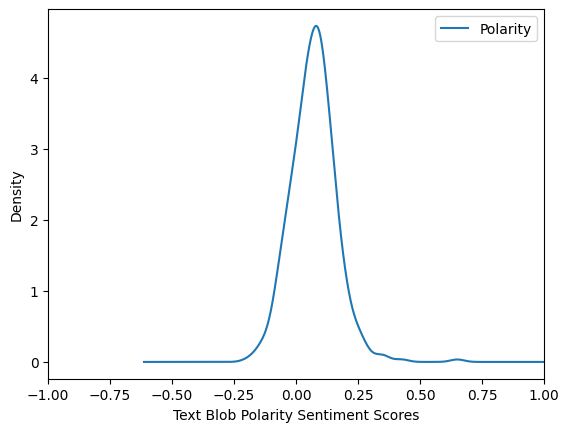

In [37]:
sentiments['text_blob_pol'].plot.density(label='Polarity')
plt.legend()
plt.xlabel('Text Blob Polarity Sentiment Scores')
plt.xlim(-1,1);


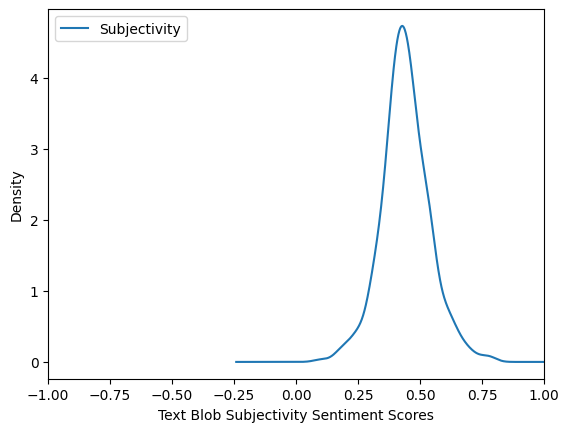

In [38]:
sentiments['text_blob_sub'].plot.density(label='Subjectivity')
plt.legend()
plt.xlabel('Text Blob Subjectivity Sentiment Scores')
plt.xlim(-1,1);

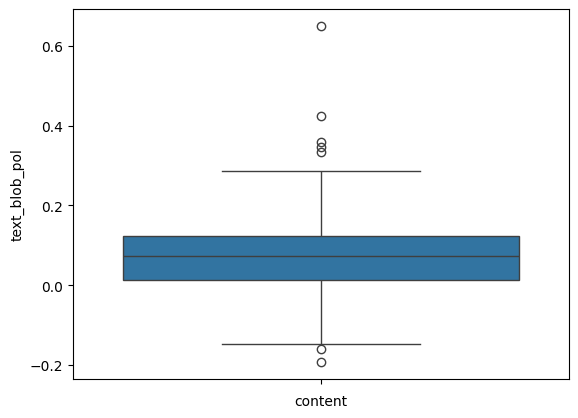

In [39]:
sns.boxplot(data=sentiments, y='text_blob_pol')
plt.xlabel('content');

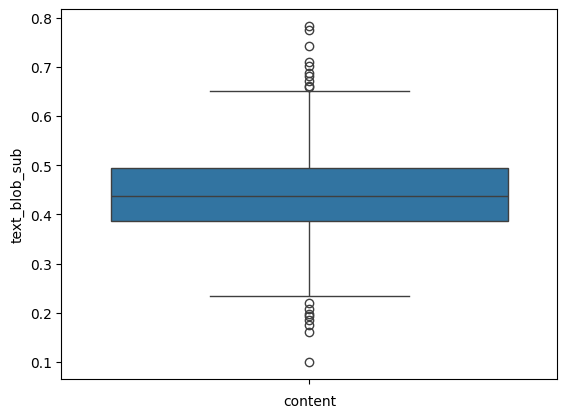

In [40]:
sns.boxplot(data=sentiments, y='text_blob_sub')
plt.xlabel('content');

## Correlation Analysis
Using a correlation analysis, we are going to caluculate a correlation coefficient between the Vader scores and TextBlob scores. A high positive correlation would indicate that the two methods agree, while a low or negative correlation would suggest disagreement.

In [41]:
correlation_coef_sub = sentiments.vader.corr(sentiments.text_blob_sub)
print("Correlation Coefficient between Vader and Text Blob Subjectivity Score:", correlation_coef_sub)

Correlation Coefficient between Vader and Text Blob Subjectivity Score: 0.0788598192542283


In [42]:
correlation_coef_pol = sentiments.vader.corr(sentiments.text_blob_pol)
print("Correlation Coefficient between Vader and Text Blob Polarity Score:", correlation_coef_pol)

Correlation Coefficient between Vader and Text Blob Polarity Score: 0.47645495254483133


## Sentiment Agreement

Since the polarity score from Text Blob tend to have a higher correlation with Vader, we are going to use this to compare the sentiments inferred by each method (positive, negative, neutral) for each text, then calculate the percentage of texts where the methods agree or disagree on the sentiment.


In [43]:
def sentiment(score):
  if score > 0:
    return 'pos'
  elif score < 0:
    return 'neg'
  else:
    return 'neu'

In [44]:
sentiments['vader_sent'] =  sentiments['vader'].apply(sentiment)
sentiments['text_blob_pol_sent'] = sentiments["text_blob_pol"].apply(sentiment)

In [45]:
sentiments['sentiment_agreement']= sentiments.vader_sent == sentiments.text_blob_pol_sent
agreement_percentage = sentiments.sentiment_agreement.mean() * 100
print('Sentiment Agreement Percentage: ', agreement_percentage)

Sentiment Agreement Percentage:  82.22748815165876


## Error Analysis

We are going to calculate the absolute difference between the Vader scores and TextBlob polarity scores for each text, then analyze cases where the difference is large to understand why the methods disagree.



In [46]:
from sklearn.metrics import mean_squared_error

In [47]:
sentiments['score_difference'] = abs(sentiments.vader - sentiments.text_blob_pol)
difference = sentiments.nlargest(10, 'score_difference')[['vader', 'text_blob_pol', 'score_difference', 'dream']]
print(difference[['vader', 'text_blob_pol', 'score_difference', 'dream']])

      vader  text_blob_pol  score_difference  \
81  -0.9761       0.081021          1.057121   
285 -0.9687       0.078272          1.046972   
384  0.9921      -0.014456          1.006556   
31   0.9339      -0.070982          1.004882   
100 -0.9084       0.088288          0.996688   
386  0.9784      -0.013754          0.992154   
399  0.9217      -0.064678          0.986378   
2   -0.9678       0.014583          0.982383   
126  0.9726      -0.007380          0.979980   
143  0.9621      -0.010727          0.972827   

                                                 dream  
81   walking several people one bobbie us trouble w...  
285  work looks nothing like library rather dim pla...  
384  somebody library looking large cabinet short c...  
31   cats moving one place another two somewhat awk...  
100  around bunch people working together sort cabi...  
386  mother recently married patrick duffy interfer...  
399  garage car worked something wheels rotating ti...  
2    watch plan

In [48]:
mse=mean_squared_error(sentiments.vader, sentiments.text_blob_pol)

print("Mean Squared Error:", mse)

Mean Squared Error: 0.5830790217679895
